<a href="https://colab.research.google.com/github/kabeerbora/bop_britain/blob/main/drain_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing/Reading main file

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Drain_gain.xlsx to Drain_gain.xlsx


In [2]:
import io
import pandas as pd
df = pd.read_excel(io.BytesIO(uploaded['Drain_gain.xlsx']), sheet_name='bop_%')
df

,year,BOP,GDP,%GDP,Unnamed: 4,%GDP_1
0,1800,-6.379051,304.230102,-2.096785,NaN,NaN
1,1801,-8.338858,325.732869,-2.560030,NaN,NaN
2,1802,7.024391,272.739974,2.575490,NaN,NaN
3,1803,-4.532336,264.449730,-1.713874,NaN,NaN
4,1804,-3.446979,279.643848,-1.232632,NaN,NaN
...,...,...,...,...,...,...
109,1909,-155.200000,1856.259326,-8.360901,3279.3,176.661739
110,1910,-144.100000,1929.491311,-7.468290,3450.3,178.819152
111,1911,-123.300000,2012.043790,-6.128097,3659.6,181.884709
112,1912,-145.700000,2099.650394,-6.939250,3864.5,184.054451


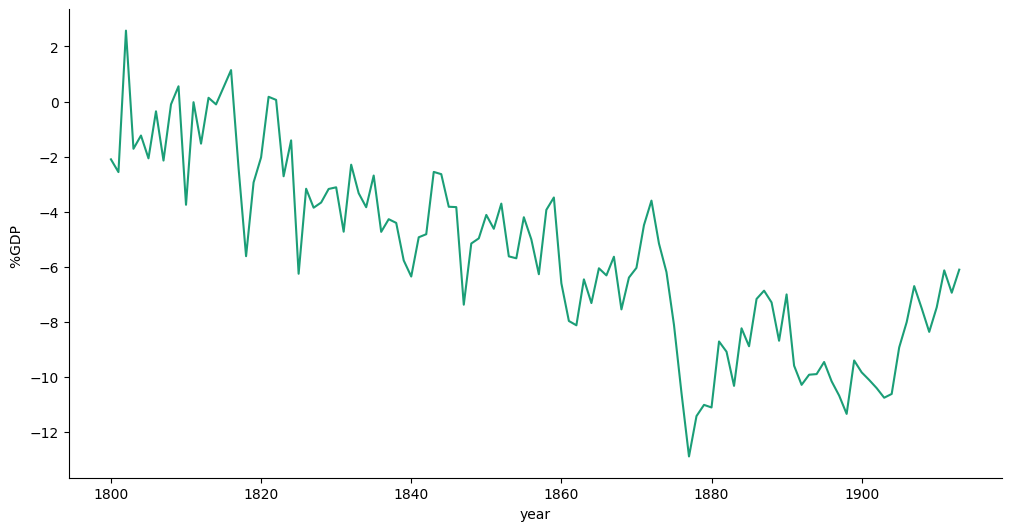

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['%GDP ']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('%GDP ')

# Plotting proportion graph and external assets

In [3]:
df_1 = pd.read_excel('/content/Drain_gain.xlsx', sheet_name='export_share')

In [4]:
df_1['Total_Export_Share'] = df_1.groupby('year')['export_share'].transform('sum')
df_1['Country_Export_Share'] = df_1['export_share'] / df_1['Total_Export_Share']

In [5]:
import altair as alt


chart = alt.Chart(df_1).mark_area().encode(
    alt.X('year:O', axis=alt.Axis(title='Year')),
    alt.Y('Country_Export_Share:Q', stack='normalize', axis=alt.Axis(title='Indian Export Shares')),
    alt.Color('country:N', legend=alt.Legend(title='Country'))
).properties(
    width=600,
    height=400,
    title='Country Export Share Over Time'
).configure_legend(
    labelLimit=0,
    titleFontSize=16,
    labelFontSize=14
).configure_view(
    strokeWidth=0
).configure_axis(
    labelFontSize=14,
    titleFontSize=16,
    grid=False
).configure_title(
    fontSize=20
)

chart.display()

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

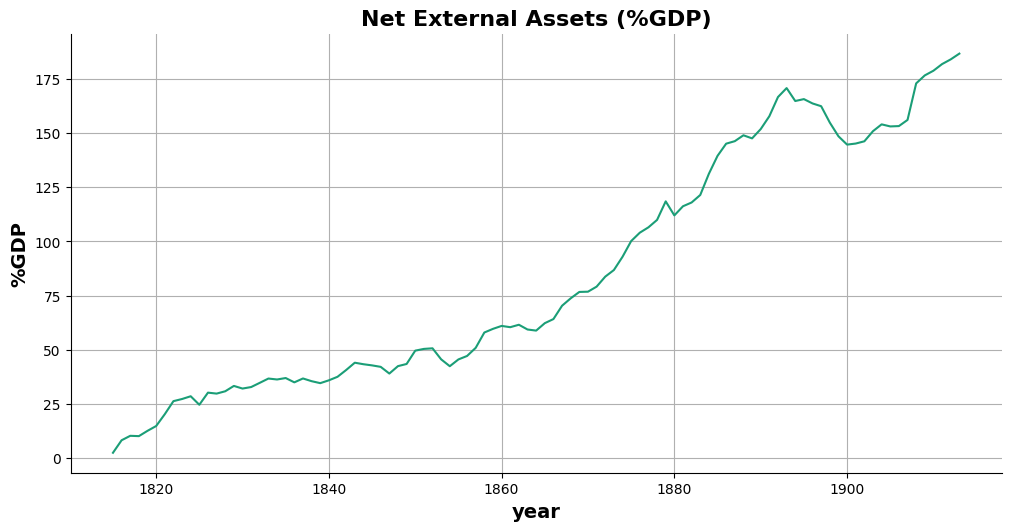

In [7]:
df = pd.read_excel('/content/Drain_gain.xlsx', sheet_name='bop_%')
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['%GDP_1']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)

# Add grid
plt.grid(True)

# Make labels bold
plt.xlabel('year', fontsize=14, fontweight='bold')
plt.ylabel('%GDP', fontsize=14, fontweight='bold')
plt.title('Net External Assets (%GDP)', fontsize=16, fontweight='bold')

plt.show()

# Plotting Drain as a \% of Profits

In [9]:
df_2 = pd.read_excel('/content/Drain_gain.xlsx', sheet_name='Drain%ofProfits')
df_2

,year,profit,drain%
0,1785,42.498337,2.588337
1,1823,98.426233,4.063957
2,1858,177.784282,4.209596
3,1901,509.142808,3.336588


In [10]:
bar_chart = alt.Chart(df_2).mark_bar().encode(
    x='year:O',
    y=alt.Y('drain%:Q', title='Drain %'),
    color=alt.Color('year:N', scale=alt.Scale(scheme='viridis'), legend=None)
)

line_chart = alt.Chart(df_2).mark_line(color='red').encode(
    x='year:O',
    y=alt.Y('profit:Q', title='Profit (mil £)', axis=alt.Axis(orient='right'))
)

chart = alt.layer(bar_chart, line_chart).resolve_scale(y='independent').properties(
    title='Drain (as a % of Profits)',
    width=400,
    height=200
).configure_legend(
    labelFontSize=12,
    titleFontSize=14
)


chart = chart.resolve_legend(color="independent")
chart = chart + alt.Chart().mark_text(align='left', baseline='middle').encode(
    x=alt.value(10),
    y=alt.value(10),
    text=alt.value('Red Line: Profits'),
    color=alt.value('red')
).properties(width=400, height=200)
chart = chart + alt.Chart().mark_text(align='left', baseline='middle').encode(
    x=alt.value(10),
    y=alt.value(30),
    text=alt.value('Bar Plot: Drain%'),
    color=alt.value('black')
).properties(width=400, height=200)



chart

alt.LayerChart(...)

# British trade balance

In [12]:
df_3['Net_Balance'] = df_3['exports'] - df_3['imports']
df_3

,year,imports,exports,Net_Balance
0,1854,10.7,9.6,-1.1
1,1855,12.7,10.4,-2.3
2,1856,17.3,11.0,-6.3
3,1857,18.7,12.2,-6.5
4,1858,15.0,17.4,2.4
5,1859,15.2,20.8,5.6
6,1860,15.1,17.7,2.6
7,1861,22.0,17.1,-4.9
8,1862,34.1,15.3,-18.8
9,1863,48.4,20.8,-27.6


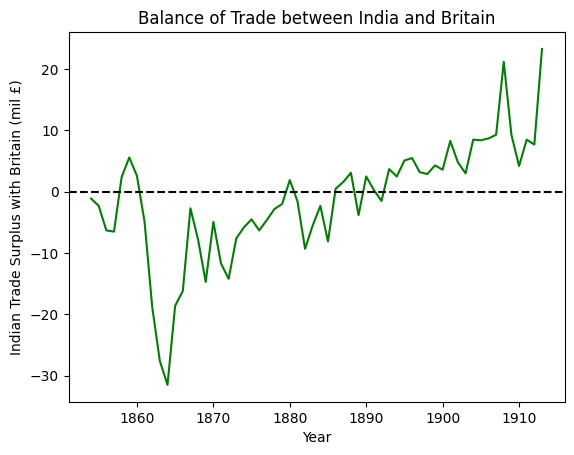

In [13]:
import matplotlib.pyplot as plt
plt.plot(df_3['year'], df_3['Net_Balance'], color='green')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Indian Trade Surplus with Britain (mil £)')
plt.title('Balance of Trade between India and Britain')
plt.show()

# Importing rop drain sheet \& plotting scatter, time series

In [52]:
df_rop = pd.read_excel('/content/Drain_gain.xlsx', sheet_name='rop_regression')
df_rop

,year,drain,drain_1,roe,capstock,capstock_1,overpop_fein_1,overpop_fein,rop,rop_1,...,Unnamed: 27,Unnamed: 28,real_gdp,real_gdp_1,exch,exch_1,real_usd,real_usd_1,cap_util,cap_util_1
0,1833,2.800493,2.429257,-0.045469,82.789031,77.102432,8.395958,8.055974,0.155959,0.167483,...,48.944079,65.494929,36361.588065,35914.146677,4.787220,4.857684,174070.930343,174459.562848,0.567434,0.603469
1,1834,1.875901,2.800493,-0.047977,90.534100,82.789031,8.055974,7.265974,0.163755,0.155959,...,44.162175,48.944079,37674.599990,36361.588065,4.638146,4.787220,174740.299202,174070.930343,0.582736,0.567434
2,1835,2.322640,1.875901,0.044520,89.755599,90.534100,7.265974,6.068022,0.173192,0.163755,...,42.415890,44.162175,40041.440182,37674.599990,4.849856,4.638146,194195.201298,174740.299202,0.601807,0.582736
3,1836,2.391248,2.322640,0.024182,81.528394,89.755599,6.068022,6.007045,0.187766,0.173192,...,52.697190,42.415890,40996.231672,40041.440182,4.817465,4.849856,197497.900554,194195.201298,0.635546,0.601807
4,1837,2.234063,2.391248,-0.050416,80.196485,81.528394,6.007045,7.489638,0.173342,0.187766,...,72.067224,52.697190,40702.140257,40996.231672,5.152537,4.817465,209719.296342,197497.900554,0.592521,0.635546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,1909,1.533792,1.189121,0.049992,83.455921,84.731965,7.700000,4.700000,0.138634,0.134851,...,191.016095,223.723378,175307.384623,170686.588703,4.872750,4.865750,854229.058424,830518.268983,0.465749,0.454512
77,1910,1.570315,1.533792,-0.039504,83.861203,83.455921,4.700000,3.000000,0.142081,0.138634,...,270.372584,191.016095,180307.322935,175307.384623,4.863750,4.872750,876969.741926,854229.058424,0.473343,0.465749
78,1911,1.582654,1.570315,-0.017224,85.514702,83.861203,3.000000,3.300000,0.147460,0.142081,...,301.865699,270.372584,186681.997889,180307.322935,4.862250,4.863750,907694.544238,876969.741926,0.479113,0.473343
79,1912,1.477638,1.582654,-0.149327,86.878619,85.514702,3.300000,2.100000,0.150445,0.147460,...,293.723720,301.865699,189810.634696,186681.997889,4.865500,4.862250,923523.643111,907694.544238,0.473490,0.479113


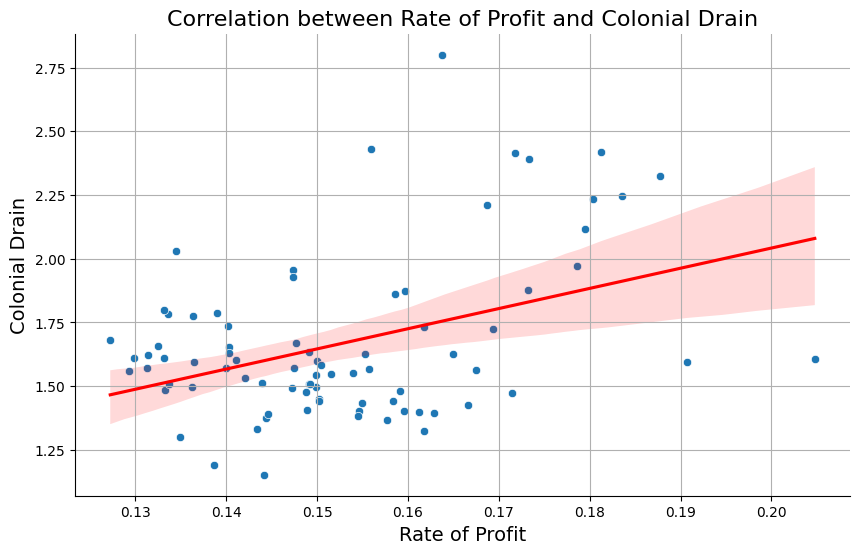

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure your figure size is appropriate
plt.figure(figsize=(10, 6))

# Create scatter plot using the correct column names from the DataFrame
sns.scatterplot(x='Rate of Profit', y='Colonial Drain', data=df_rop)

# Set custom titles and labels for the axes
plt.title('Correlation between Rate of Profit and Colonial Drain', fontsize=16)
plt.xlabel('Rate of Profit', fontsize=14)  # This will show "Rate of Profit" on the x-axis
plt.ylabel('Colonial Drain', fontsize=14)  # This will show "Colonial Drain" on the y-axis

# Add a regression line without scatter points
sns.regplot(x='Rate of Profit', y='Colonial Drain', data=df_rop, scatter=False, color='red')

# Remove the top and right spines (optional aesthetic choice)
sns.despine()


plt.grid(True)

# Show the plot
plt.show()


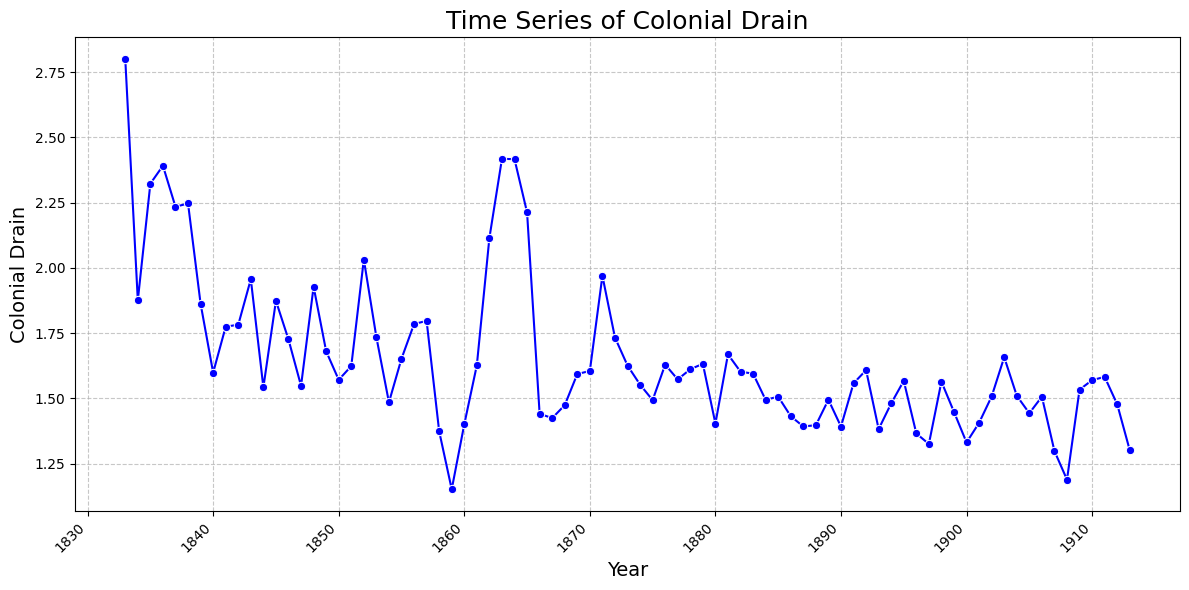

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='drain', data=df_rop, marker='o', color='blue')
plt.title('Time Series of Colonial Drain', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Colonial Drain', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

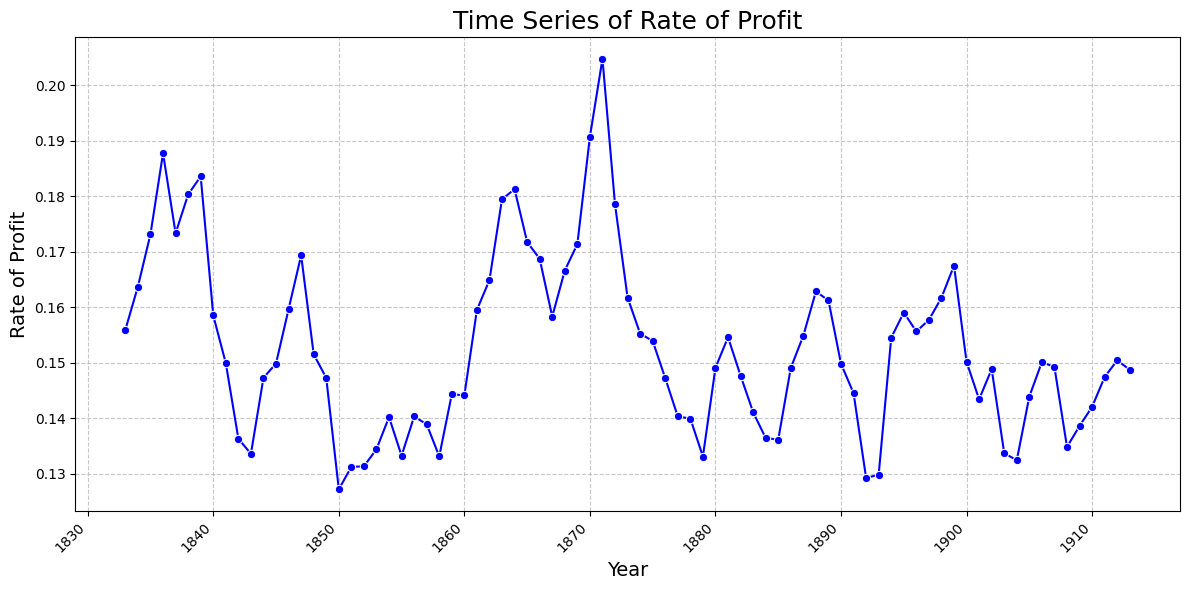

In [58]:
plt.figure(figsize=(12, 6))

sns.lineplot(x='year', y='rop', data=df_rop, marker='o', color='blue')


plt.title('Time Series of Rate of Profit', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Rate of Profit', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Plotting the ROP and Drain trends

In [61]:
df_index = pd.read_excel('/content/Drain_gain.xlsx', sheet_name='trends')

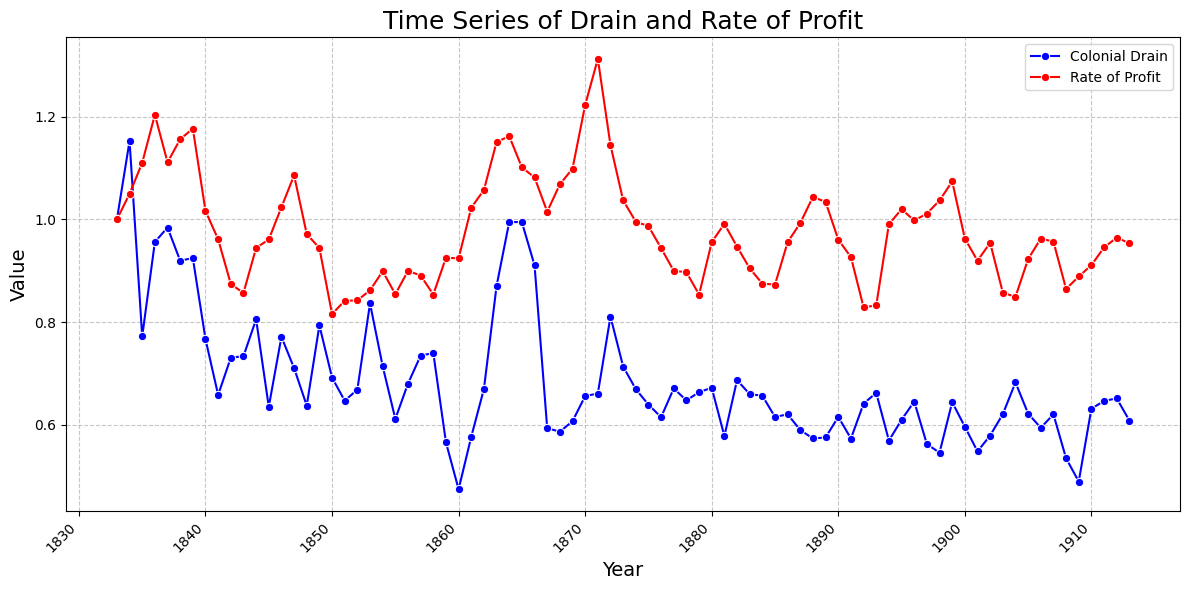

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_index is your DataFrame containing 'drain' and 'rop' columns
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Create the time series plot for drain
sns.lineplot(x='year', y='drain', data=df_index, label='Colonial Drain', marker='o', color='blue')

# Create the time series plot for rop
sns.lineplot(x='year', y='rop', data=df_index, label='Rate of Profit', marker='o', color='red')

# Customize the plot for better aesthetics
plt.title('Time Series of Drain and Rate of Profit', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')

# Add a legend to distinguish the lines
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()